<a href="https://colab.research.google.com/github/murthy545/murthy545/blob/main/Project_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries and dataset

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten,MaxPool2D
from keras.datasets import mnist

Load the data and split it to train and test

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Get the image size

In [4]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Looking through the dataset

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Print the image label

In [6]:
y_train[0]

5

Let's look into the image using matplotlib

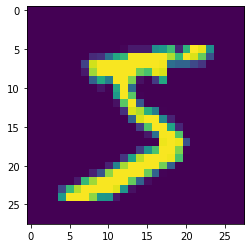

In [7]:
plt.imshow(x_train[0])
plt.show()

Normalize the data



In [8]:
x_train = x_train / 255
x_test = x_test / 255

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
x_train[0].shape

(28, 28)

In [11]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Model development

In [12]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation="relu", padding="same",
                        input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
model.fit(x_train,y_train,epochs=10,validation_split=0.4)

Epoch 1/10
1125/1125 [==============================] - 24s 8ms/step - loss: 0.5317 - accuracy: 0.8319 - val_loss: 0.1171 - val_accuracy: 0.9749
Epoch 2/10
1125/1125 [==============================] - 8s 7ms/step - loss: 0.1539 - accuracy: 0.9634 - val_loss: 0.0782 - val_accuracy: 0.9809
Epoch 3/10
1125/1125 [==============================] - 8s 7ms/step - loss: 0.1109 - accuracy: 0.9752 - val_loss: 0.0615 - val_accuracy: 0.9855
Epoch 4/10
1125/1125 [==============================] - 8s 7ms/step - loss: 0.0841 - accuracy: 0.9814 - val_loss: 0.0623 - val_accuracy: 0.9850
Epoch 5/10
1125/1125 [==============================] - 9s 8ms/step - loss: 0.0689 - accuracy: 0.9838 - val_loss: 0.0943 - val_accuracy: 0.9805
Epoch 6/10
1125/1125 [==============================] - 9s 8ms/step - loss: 0.0658 - accuracy: 0.9840 - val_loss: 0.0527 - val_accuracy: 0.9895
Epoch 7/10
1125/1125 [==============================] - 8s 7ms/step - loss: 0.0523 - accuracy: 0.9876 - val_loss: 0.0543 - val_accuracy

In [13]:
y_pred = model.predict(x_test)
y_pred[8]

array([3.7043586e-16, 7.3334509e-19, 6.0738844e-15, 6.3003663e-06,
       4.1566706e-15, 9.9999368e-01, 7.6716444e-10, 1.4330676e-18,
       9.6271147e-10, 8.3526526e-11], dtype=float32)

In [14]:
np.argmax(y_pred[8])

5

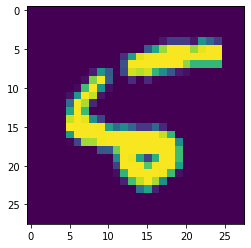

In [15]:
plt.imshow(x_test[8])

In [16]:
from keras.models import load_model

model.save('my_model.h5')
model = load_model('my_model.h5')

# Model Deployment

In [17]:
! pip install streamlit

In [17]:
! pip install -r requirement.txt

SyntaxError: ignored